In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import urllib.request
import tarfile

from pathlib import Path

### Fetch Data
California Housing Prices dataset from the StatLib repository

In [2]:
dataUrl = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"

dataTgzPath = Path("housing.tgz")
dataCsvPath = Path("housing.csv")

if not dataCsvPath.exists():
    urllib.request.urlretrieve(dataUrl, dataTgzPath)
    dataTgzFile = tarfile.open(dataTgzPath)
    dataTgzFile.extractall()
    dataTgzFile.close()
    dataTgzPath.unlink()

In [3]:
housingData = pd.read_csv(dataCsvPath)

---

###### Show the first 5 rows of the dataframe

In [4]:
housingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


---

###### Show column names and data types

In [5]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Notice ```total_bedrooms``` has only 20433 nonnull values, meaning 207 districts are missing that feature

---

###### Show column count, mean, std, min, max, etc.

In [6]:
housingData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


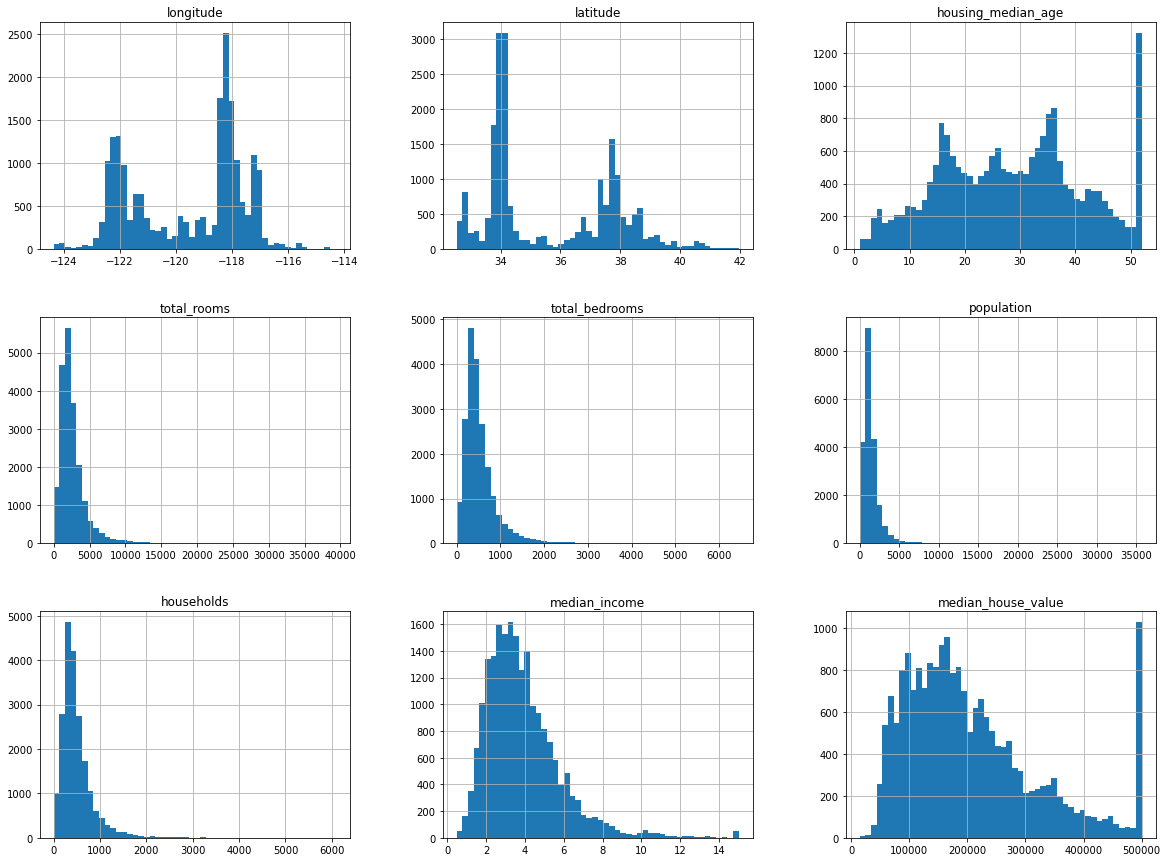

In [7]:
housingData.hist(bins=50, figsize=(20,15))
plt.show()

Some of these histograms are tail-heavy, they extend much farther to the right of the median. This may make it harder for some ML algorithms to detect patterns 

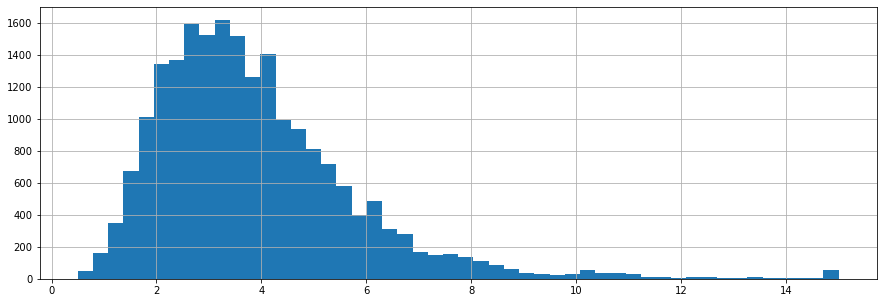

In [8]:
housingData["median_income"].hist(bins=50, figsize=(15,5))
plt.show()

The data has been scaled and capped at 15

15  - Higher Median Incomes

0.5 - Lower Median Incomes

This number also represents rought tens of thousands of dollars (eg. 3 is about $30,000)

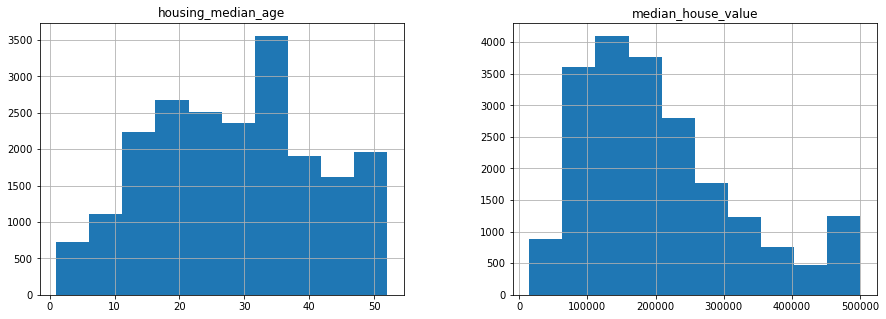

In [9]:
housingData[["housing_median_age", "median_house_value"]].hist(figsize=(15,5))
plt.show()

Both of these attributes are capped, meaning you can collect propper labels or you can remove capped districts

---

Find correlations

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


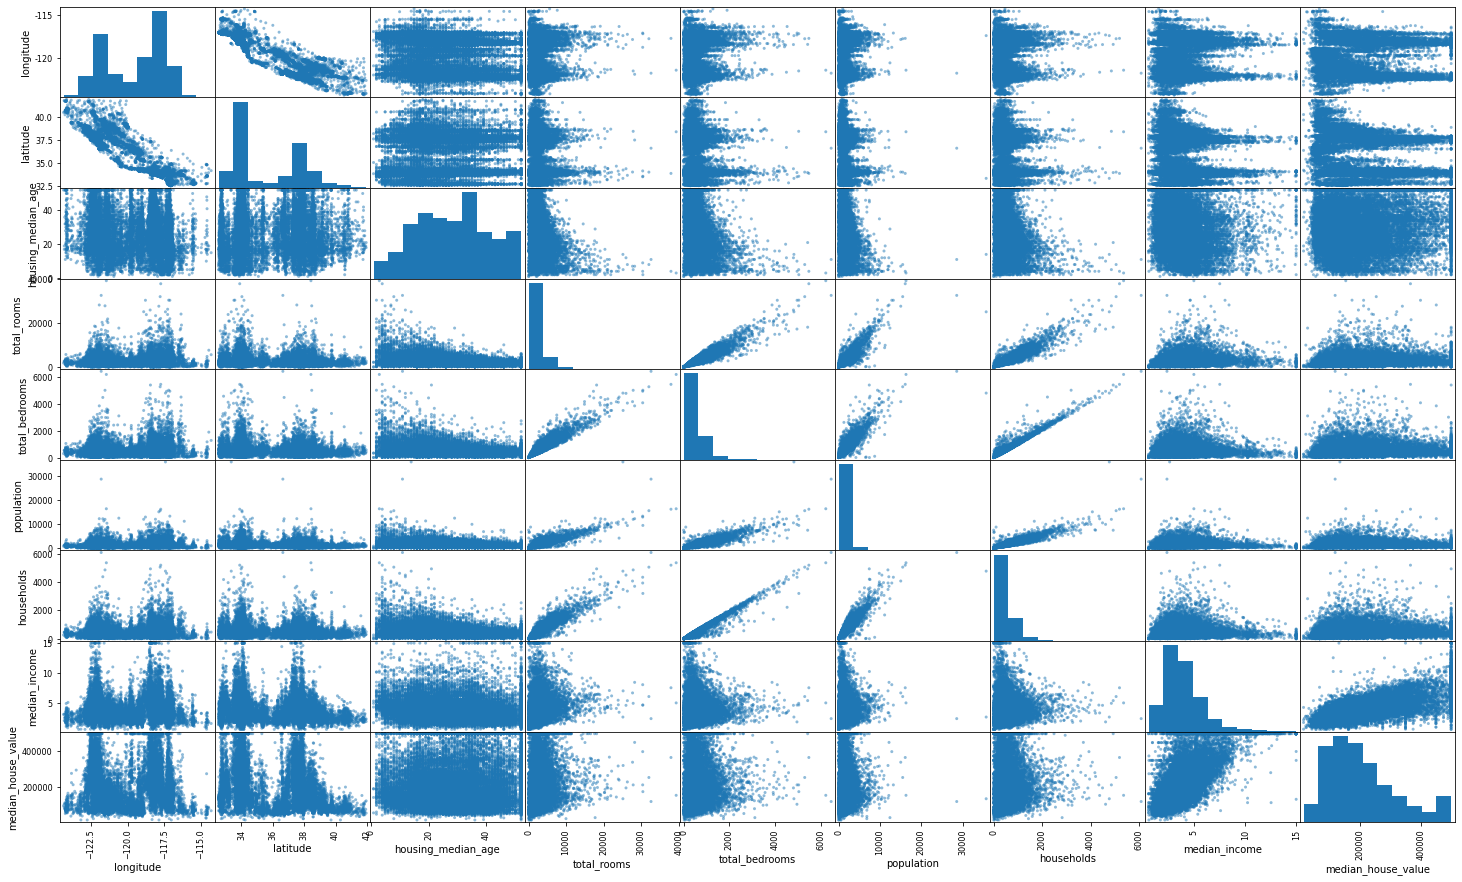

In [10]:
pd.plotting.scatter_matrix(housingData, figsize=(25, 15))
housingData.corr()

### Data Cleaning

#### Missing Features

Since ```total_bedrooms``` is missing 207 values, the options are
1. Get rid of the corresponding districts:

```python
housingData.dropna(subset["total_bedrooms"])
```
2. Get rid of the whole attribute:

```python
housingData.drop(subset["total_bedrooms"], axis=1)
```
3. Set the values to some value:

```python
median = housingData["total_bedrooms"].median()
housingData["total_bedrooms"].fillna(median, inplace=True)
```

or use `sklearn.impute.SimpleImputer`

In [11]:
from sklearn.impute import SimpleImputer
inputer = SimpleImputer(strategy="median")

# ocean_proximty contains only text attributes
# create another dataframe based on the original
# with only numerical attributes

housingDataNumericalOnly = housingData.drop("ocean_proximity", axis=1)

# This will apply the inputer to all missing numerical
# values, not only ocean_proximity
inputer.fit(housingDataNumericalOnly)
print(inputer.statistics_)

transformedFeatures = inputer.transform(housingDataNumericalOnly)

# Put back into pandas dataframe
housingDataFull = pd.DataFrame(transformedFeatures, 
                           columns=housingDataNumericalOnly.columns, 
                           index=housingDataNumericalOnly.index)

housingDataFull.info()

[-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Text and Categorial Attributes
```ocean_proximity``` contains text attributes

In [14]:
print(housingData["ocean_proximity"].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


There are a limited number of possible values, each of one represents a category. So this attribute is a categorial attribute.

```sklearn.preprocessing.OrdinalEncoder``` can convert text to numbers

In [20]:
from sklearn.preprocessing import OrdinalEncoder
ordEnc = OrdinalEncoder()
housingDataEncoded = ordEnc.fit_transform(housingData[["ocean_proximity"]])
np.unique(housingDataEncoded)

array([0., 1., 2., 3., 4.])

This can create a problem, some ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g. some ordered categories lokes "bad", "average", "good" and "excelent"), but it is not the case here. To fix this issue, a common solution is to create one binary attribute per category.

In [27]:
from sklearn.preprocessing import OneHotEncoder
categoriesEncoder = OneHotEncoder()
housingCategories1H = categoriesEncoder.fit_transform(housingData[["ocean_proximity"]])
housingCategories1H

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [31]:
categoriesEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Feature Scaling
ML algorithms don't perform well when the input numerical attributes have very different scales

In [11]:
# Create a train set and a test set, the test set is usually 20% of the data
from sklearn.model_selection import train_test_split

trainSet, testSet = train_test_split(housingData, test_size=0.2, random_state=42)